# STAT207 Mini-Project #2 - Insurance Cost Prediction
Connor Slattery

In [187]:
#Imports here
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

## 1. Introduction

In this project, I’m building a model to predict how age, sex, location, number of children, and BMI affect medical charges. I cleaned the data by turning “sex” and “smoker” into binary numbers (is a smoker = 1 and not a smoker = 0) and created new columns for the regions. Everything is set up so the model can work better, is more accurate, and easily reproducible.

### Research Goal: 
My main goal is to build a predictive model that effectively predicts new datasets' insurance charges. I used at least five variables: age, BMI, number of children, gender, and whether or not someone smokes. I also added location by turning regions into variables. My second goal is to test how transforming the data (for example, using the square root of charges) or adding interaction terms affects how well the model makes predictions.

### Research Question: 
How does the relationship between BMI and insurance charges change depending on whether someone smokes?

### Research Motivation: 
This kind of prediction can be helpful for people who work in health insurance. For example, an insurance company could use this model to determine how much to charge someone based on their background and health habits. It could also help people understand what factors make insurance more expensive and how their choices, like smoking, might affect how much they pay.

## 2. Dataset Discussion

For this project, I’m using a dataset from Kaggle, which was created by a user named Miri Choi. The here souce material i.e. datasets came from the book Machine Learning with R by Brett Lantz. It includes information about people’s health insurance, such as age, sex, BMI, children, smoking status, region, and charges (how much they pay for insurance). The dataset was originally in a different format, so this dataset creator cleaned it up into a csv file to match the format in the book. 

Where to find dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance
I recently downloaded it on aprox. 3/29/2025

In [188]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [189]:
df.shape[0]

1338

## 3. Dataset Cleaning

Before I could start working with the data, I needed to clean it up:

1. **Checking for Missing Data:**  
    I checked for any missing values in the dataset and used `df.dropna()` to remove any incomplete rows. After reviewing the data, I found that no rows were dropped, as the dataset was already clean. I just wanted to verify this for myself. 

2. **Checking Values:**  
   I checked the unique values in columns like **age**, **sex**, **bmi**, **children**, **smoker**, and **region** to make sure there were no mistakes or out-of-place numbers, like negative ages or BMI values.

3. **Counting Values:**  
   I also looked at how many times each value showed up in important columns like **age**, **sex**, and **smoker**. This helped me see if the data was evenly spread out or if there were any strange outliers.

These steps helped make the dataset ready for analysis by fixing missing or incorrect data.

In [190]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [191]:
np.sort(df['age'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [192]:
np.sort(df['sex'].unique())

array(['female', 'male'], dtype=object)

In [193]:
np.sort(df['bmi'].unique())

array([15.96 , 16.815, 17.195, 17.29 , 17.385, 17.4  , 17.48 , 17.67 ,
       17.765, 17.8  , 17.86 , 17.955, 18.05 , 18.3  , 18.335, 18.5  ,
       18.6  , 18.715, 18.905, 19.   , 19.095, 19.19 , 19.3  , 19.475,
       19.57 , 19.8  , 19.855, 19.95 , 20.045, 20.1  , 20.13 , 20.235,
       20.3  , 20.35 , 20.4  , 20.425, 20.52 , 20.6  , 20.615, 20.7  ,
       20.79 , 20.8  , 20.9  , 21.01 , 21.09 , 21.12 , 21.28 , 21.3  ,
       21.375, 21.4  , 21.47 , 21.5  , 21.56 , 21.565, 21.66 , 21.7  ,
       21.755, 21.78 , 21.8  , 21.85 , 21.89 , 21.945, 22.   , 22.04 ,
       22.1  , 22.135, 22.22 , 22.23 , 22.3  , 22.42 , 22.515, 22.6  ,
       22.61 , 22.705, 22.77 , 22.8  , 22.88 , 22.895, 22.99 , 23.   ,
       23.085, 23.1  , 23.18 , 23.2  , 23.21 , 23.275, 23.3  , 23.32 ,
       23.37 , 23.4  , 23.465, 23.54 , 23.56 , 23.6  , 23.65 , 23.655,
       23.7  , 23.75 , 23.76 , 23.8  , 23.845, 23.87 , 23.9  , 23.94 ,
       23.98 , 24.035, 24.09 , 24.1  , 24.13 , 24.225, 24.3  , 24.31 ,
      

In [194]:
np.sort(df['children'].unique())

array([0, 1, 2, 3, 4, 5])

In [195]:
np.sort(df['smoker'].unique())

array(['no', 'yes'], dtype=object)

In [196]:
np.sort(df['region'].unique())

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [197]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [198]:
cleaned = df.dropna()

total_rows_dropped = cleaned.shape[0] - df.shape[0]
total_rows_dropped

0

In [199]:
age_counts = df['age'].value_counts()
age_counts

age
18    69
19    68
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64

In [200]:
sex_counts = df['sex'].value_counts()
sex_counts

sex
male      676
female    662
Name: count, dtype: int64

In [201]:
children_counts = df['children'].value_counts()
children_counts

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [202]:
smoker_counts = df['smoker'].value_counts()
smoker_counts

smoker
no     1064
yes     274
Name: count, dtype: int64

In [203]:
region_counts = df['region'].value_counts()
region_counts

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

## 4. Preliminary Analysis

### 1. Variable Transformations

- The pairs plot below shows the relationships between the numerical variables. This analysis helped me understand the relationships between variables before building the model.
  
- The graph also illustrates the relationship between **Fitted Values** and **Residuals**. The linear regression model includes seven variables: age, BMI, children, gender, smoking status, region, and charges. The model's R-squared value is 0.751, indicating that it explains most of the data.

- To check for linearity in the model, I examined the relationship between the fitted values and residuals. The analysis showed no noticeable patterns, which confirmed that the linearity assumption was valid.

In [204]:
df['is_male'] = (df['sex'] == 'male').astype(int)
df['is_smoker'] = (df['smoker'] == 'yes').astype(int)
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df_clean = df.drop(['sex', 'smoker'], axis=1)

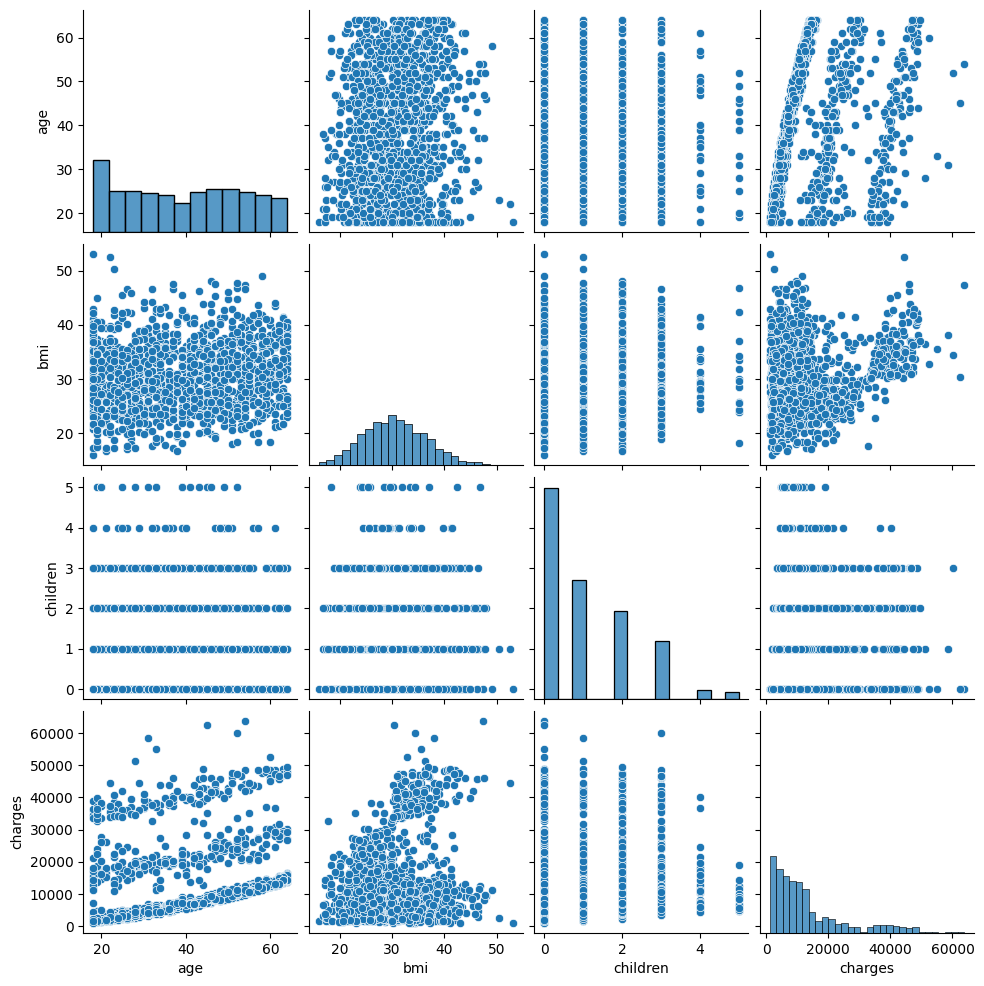

In [205]:
num_vars = ['age', 'bmi', 'children', 'charges']
sns.pairplot(df[num_vars])
plt.show()

In [206]:
import statsmodels.formula.api as smf

formula_string = 'charges~'
formula_string += 'age'
formula_string += '+bmi'
formula_string += '+children'
formula_string += '+is_male'
formula_string += '+is_smoker'
formula_string += '+region_northwest'
formula_string += '+region_southeast'
formula_string += '+region_southwest'

full_model = smf.ols(formula=formula_string, data=df_clean).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:26:42   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
region_northwest[T.True]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast[T.True] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest[T.True]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
age                        256.8564     11.899     21.587      0.000     233.514     280.199
bmi                        339.1935     28.599     11.860      0.000     283.088     395.298
children                   475.5005    137.804      3.451      0.001     205.163     745.838
is_male                   -131.3144    332.945     -0.394      0.693    -784.470     521.842
is_smoker                 2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

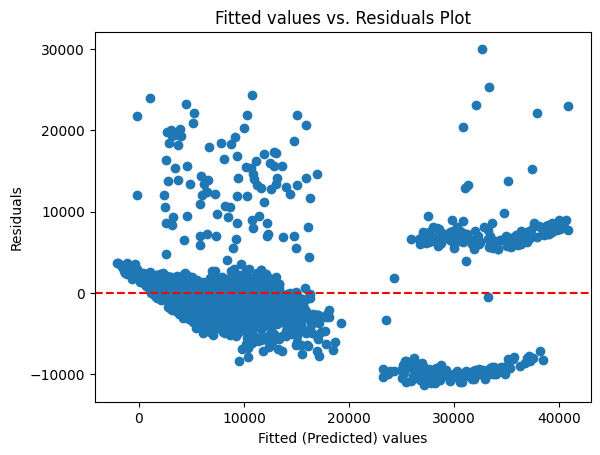

In [207]:
plt.scatter(full_model.fittedvalues, full_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

### 2. Transforming Model

#### Variable Transformation

- The analysis of fitted values against residuals revealed non-linear relationships between the charges data points. To address this, a square root transformation was applied to the charges variable, resulting in a new variable called **sqrt_charges**.

#### Refitting the Model with Transformed Variables

- Using the transformed charges variable (**sqrt_charges**), I ran the model again. The updated model fits the data better, with an improved R-squared value of 0.780.

#### Re-evaluating the Linearity Assumption

- The plot of the transformed model confirmed no patterns or changes, indicating that the transformation successfully enhanced the model by increasing its R^2 and overall fit.


In [208]:
df['sqrt_charges'] = np.sqrt(df['charges'])
df.head()

,age,sex,bmi,children,smoker,charges,is_male,is_smoker,region_northwest,region_southeast,region_southwest,sqrt_charges
0,19,female,27.900,0,yes,16884.92400,0,1,False,False,True,129.942002
1,18,male,33.770,1,no,1725.55230,1,0,False,True,False,41.539768
2,28,male,33.000,3,no,4449.46200,1,0,False,True,False,66.704288
3,33,male,22.705,0,no,21984.47061,1,0,True,False,False,148.271611
4,32,male,28.880,0,no,3866.85520,1,0,True,False,False,62.184043


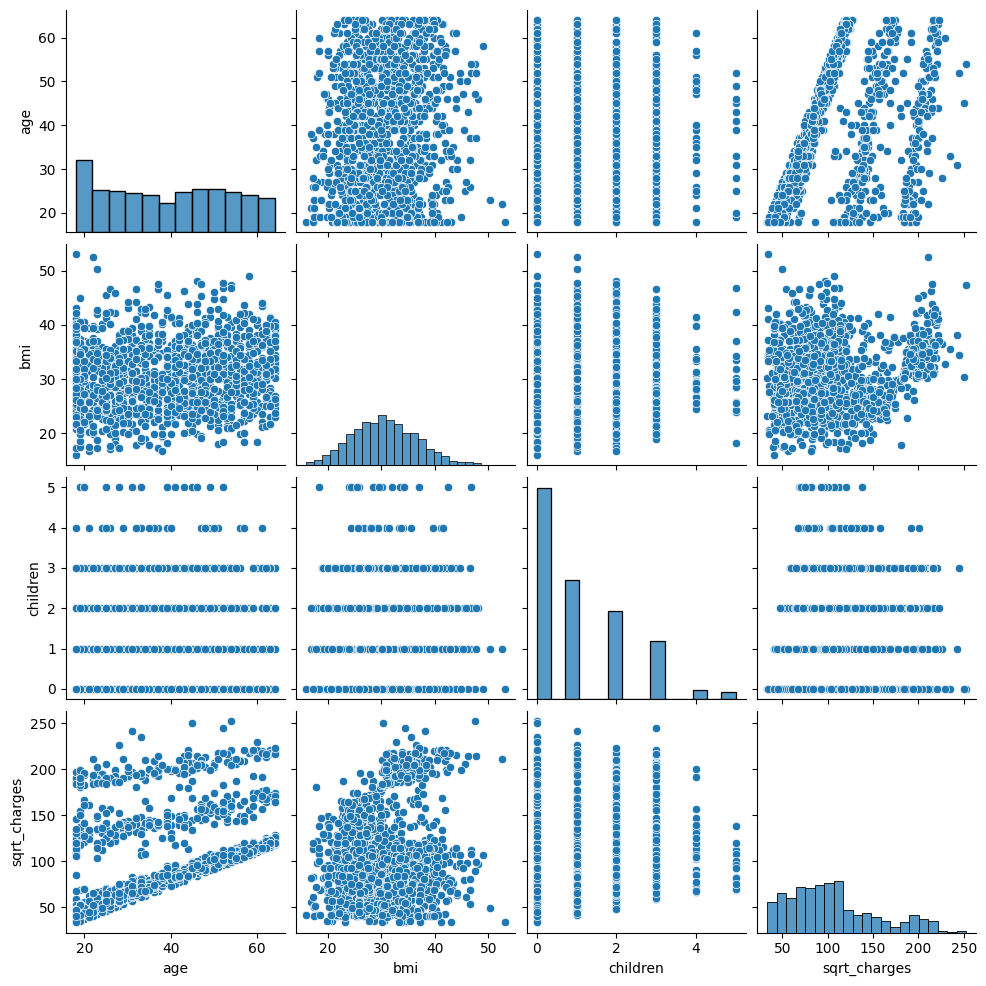

In [209]:
sns.pairplot(df[['age', 'bmi', 'children', 'sqrt_charges']])
plt.show()

In [210]:
sqrt_formula = "sqrt_charges ~ age + bmi + children + is_male + is_smoker + region_northwest + region_southeast + region_southwest"
sqrt_model = smf.ols(formula=sqrt_formula, data=df).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sqrt_charges   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     587.4
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:26:44   Log-Likelihood:                -6059.7
No. Observations:                1338   AIC:                         1.214e+04
Df Residuals:                    1329   BIC:                         1.218e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.6435      3.666      0.176      0.861      -6.548       7.835
region_northwest[T.True]    -2.3767      1.768     -1.345      0.179      -5.844       1.091
region_southeast[T.True]    -5.8945      1.776     -3.318      0.001      -9.379      -2.409
region_southwest[T.True]    -5.2014      1.774     -2.933      0.003      -8.681      -1.722
age                          1.3983      0.044     31.666      0.000       1.312       1.485
bmi                          1.0300      0.106      9.704      0.000       0.822       1.238
children                     3.2743      0.511      6.402      0.000       2.271       4.278
is_male                     -1.9123      1.236     -1.548      0.122      -4.336       0.512
is_smoker                   90.8717      1.533     59.267      0.000      87.864      93.880
==============================================================================
Omnibus:                      480.229   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1605.806
Skew:                           1.783   Prob(JB):                         0.00
Kurtosis:                       7.010   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

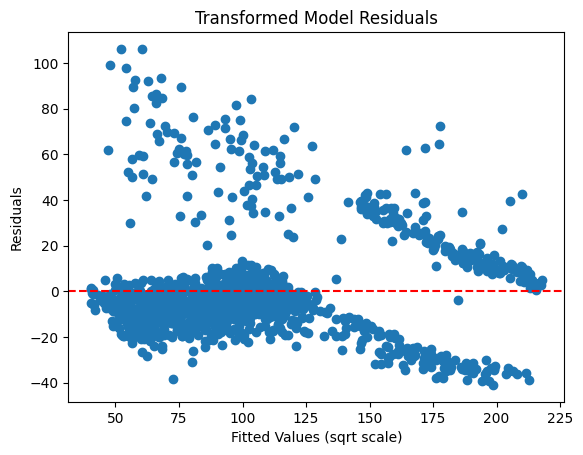

In [211]:
plt.scatter(sqrt_model.fittedvalues, sqrt_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values (sqrt scale)')
plt.ylabel('Residuals')
plt.title('Transformed Model Residuals')
plt.show()

### Interaction Terms

#### Scatterplots for Numerical and Categorical Interaction

- I investigated how numerical and categorical variables interact through scatterplot analysis. The data was color-coded by category and included category-specific best-fit lines.

**Key Observations:**

- **Age vs. sqrt(charges) by Smoking Status:**  
  
  The relationship between age and charges varies depending on smoking status. Non-smokers showed a clear correlation between age and charges, with charges rising as age increased. Older smokers had more unpredictable data points. This could be due to insurance companies treating smokers differently, and the fact that smokers are underrepresented in the data, since less people smoke.

- **BMI vs. sqrt(charges) by Smoking Status:**  
  
  Non-smokers had lower charges than smokers with higher BMI levels. Non-smokers did not show a strong connection between BMI and charges, this is likley due to the fact BMI is a spectrum and age is more linear. 

- **Children vs. sqrt(charges) by Smoking Status:** 

  The relationship between the number of children someone has and their insurance cost didn’t show much of a clear pattern when looking at smokers and non-smokers. This is probably because the number of children only ranges from 0 to 5 amd more people have less than 5 children, so it’s hard to see any strong visual trend. However, it was still clear that smoking increases insurance costs, but this increase doesn’t seem to be because of the number of children.


#### Interpretation of Interaction

- The scatterplots suggest that smoking status affects the relationship between age, BMI, and charges. Smoking status has a greater impact on the relationship between BMI and charges for smokers and on the relationship between age and charges for non-smokers.


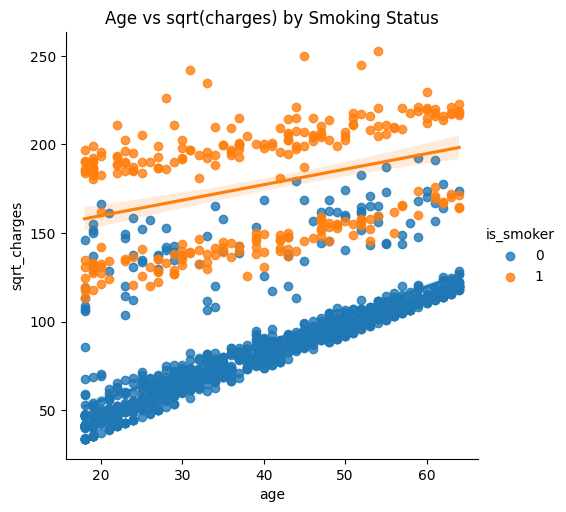

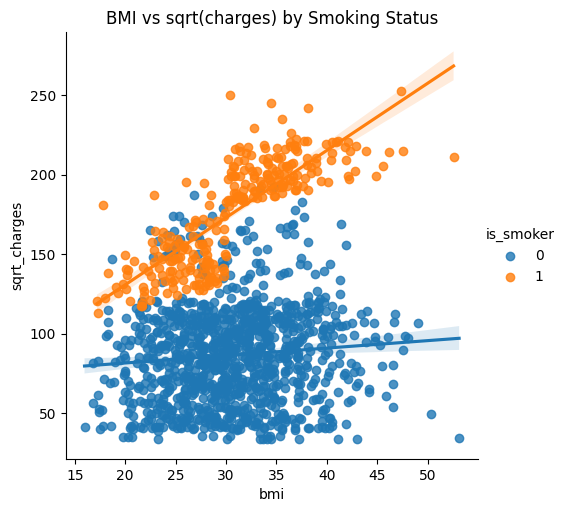

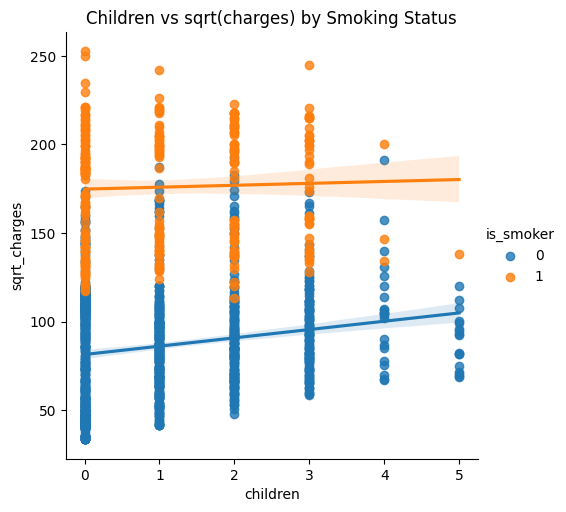

In [223]:
sns.lmplot(x='age', y='sqrt_charges', hue='is_smoker', data=df)
plt.title("Age vs sqrt(charges) by Smoking Status")
plt.show()

sns.lmplot(x='bmi', y='sqrt_charges', hue='is_smoker', data=df)
plt.title("BMI vs sqrt(charges) by Smoking Status")
plt.show()

sns.lmplot(x='children', y='sqrt_charges', hue='is_smoker', data=df)
plt.title("Children vs sqrt(charges) by Smoking Status")
plt.show()


### 5. Predictive Models

In this section, I will build and test a linear regression model to predict the response variable, `sqrt_charges`. The model will use various explanatory variables, such as age, BMI, number of children, gender, smoking status, and region.

#### Explanatory Variables

The explanatory variables included in the model are:

- **age**: The age of the individual.
- **bmi**: The body mass index of the individual.
- **children**: The number of children covered by the insurance.
- **is_male**: A binary indicator variable representing whether the individual is male (1) or not (0).
- **is_smoker**: A binary indicator variable for smoking status (1 for smoker, 0 for non-smoker).
- **region_northwest, region_southeast, region_southwest**: Binary indicator variables representing the region where the individual resides.

#### Train-Test Split

I split the data into training and test datasets using an 80-20% ratio to verify proper model validation. This means that 80% of the data was used to train the model, and 20% was reserved for testing its predictive performance. The split and scaling is done using the following code:

In [224]:
from sklearn.model_selection import train_test_split

X = df[['age', 'bmi', 'children', 'is_male', 'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest']] 
y = df['sqrt_charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.head()

,age,bmi,children,is_male,is_smoker,region_northwest,region_southeast,region_southwest
67,40,26.315,1,1,0,True,False,False
736,37,38.390,0,0,1,False,True,False
310,50,26.600,0,1,0,False,False,True
963,46,24.795,3,1,0,False,False,False
680,21,17.400,1,0,0,False,False,True


In [225]:
X_test.head()

,age,bmi,children,is_male,is_smoker,region_northwest,region_southeast,region_southwest
650,49,42.680,2,0,0,False,True,False
319,32,37.335,1,1,0,False,False,False
314,27,31.400,0,0,1,False,False,True
150,35,24.130,1,1,0,True,False,False
336,60,25.740,0,1,0,False,True,False


In [226]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['age', 'bmi', 'children']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## 5.1 Non-Regularized Linear Regression Full Model

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

full_model = LinearRegression()
full_model.fit(X_train, y_train)
y_pred = full_model.predict(X_test)
r2_score(y_test, y_pred)

0.8299423777271112

## 5.2 Non-Regularized Linear Regression Full Model with Interaction Terms 

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train['smoker_bmi'] = X_train['is_smoker'] * X_train['bmi']
X_test['smoker_bmi'] = X_test['is_smoker'] * X_test['bmi']

interaction_model = LinearRegression()
interaction_model.fit(X_train, y_train)
r2_score(y_test, interaction_model.predict(X_test))

0.8766959584571495

## Feature Selection OPTION C: LASSO Regularization Model 

In [229]:
from sklearn.linear_model import Lasso

r2_list = []
for lam in np.arange(0, 0.505, 0.005):
    lasso_mod = Lasso(alpha=lam, max_iter=10000)
    lasso_mod.fit(X_train, y_train)
    test_r2 = lasso_mod.score(X_test, y_test)
    r2_list.append([lam, test_r2])

df_test_r2 = pd.DataFrame(r2_list, columns=['lambda', 'test_r2'])
df_test_r2.nlargest(5, 'test_r2')

C:\Users\cjsla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\cjsla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\cjsla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider i

,lambda,test_r2
25,0.125,0.877279
24,0.120,0.877278
26,0.130,0.877277
23,0.115,0.877276
27,0.135,0.877274


# 6. Best Model

The strongest predictor of insurance costs is a Lasso model. It scored 0.877 on a test (meaning it explains 87.7% of why insurance costs change). It uses factors like:

- Age
- BMI (body mass index)
- Children
- If you smoke
- Regions (Location)

It ignored cobinations like gender and specific regions because they didn’t help guess the cost of insurance accurately.

In [230]:
best_lasso_mod = Lasso(alpha=0.125, max_iter=1000)
best_lasso_mod.fit(X_train, y_train)[26]: Lasso(alpha=0.125)

In [231]:
df_slopes = pd.DataFrame({'best_lasso_mod': best_lasso_mod.coef_.T}, index=X_train.columns) 
df_slopes

,best_lasso_mod
age,19.969492
bmi,1.072067
children,4.277937
is_male,-2.953936
is_smoker,88.856476
region_northwest,-1.102280
region_southeast,-4.283634
region_southwest,-4.649143
smoker_bmi,24.063778


In [232]:
best_lasso_mod.intercept_

np.float64(90.70158680075524)

In [233]:
y_pred = best_lasso_mod.predict(X_test)
r_squared = r2_score(y_test, y_pred)
r_squared

0.8772786564171124

### Equation:
Predicted Cost = 90.7016 + 19.9695 (age) + 1.0721 (BMI) + 4.2779 (children) - 2.9539 (is_male) + 88.8565 (is_smoker) - 1.1023 (region_northwest) - 4.2836 (region_southeast) - 4.6491 (region_southwest) + 24.0638 (smoker_bmi)

### Overfitting Explanatory Variables:
- Because this is a Lasso model, it automatically removes or shrinks variables that don’t help much. This suggests that some of the original explanatory variables were overfitting the model. Variables that got zeroed out were likely not very useful and may have caused overfitting. Since all the variables listed in the final model have non-zero slopes, it means the model removed the ones that were overfitting.

### Multicollinearity:
- The remaining variables in the model do not show signs of multicollinearity. This is because Lasso also helps reduce multicollinearity by shrinking related variables. Each of the final variables has a clear, separate effect, so they are not overlapping too much or confusing the model.

### Slope Interpretations:
The magnitudes of the slopes with the variables are important in predicting `sqrt_charges`. For example:

- **is_smoker** has the highest slope (88.856), meaning being a smoker has the biggest impact on increasing charges.
- **smoker_bmi** (24.064) also has a big effect, showing that smokers with higher BMI pay more.
- **age** (19.969) and **children** (4.278) are also important, but less than smoking.
- **bmi** (1.072) and **gender/region variables** have smaller effects.

So, smoking status and smoker BMI are the most important predictors based on the slope sizes.

## 7. Conclusion

- The research question was: **How does the relationship between BMI and insurance charges change depending on whether someone smokes?** The results showed that smoking makes BMI have a more significant impact on insurance costs. For people who don’t smoke, BMI doesn’t affect their insurance costs much. But for smokers, a higher BMI makes insurance much more expensive.

### Recommendation

- The best model is a Lasso model, which has an R² of 0.877. This means it does a good job of predicting insurance costs. I would recommend using this model in health insurance because it focuses on the most important factors: age, smoking, BMI, number of children, and region. It’s simple, accurate, and doesn’t include unnecessary details.

### Shortcomings/Caveats

- This might not be the best model out there. Other models that I didn't test, like Ridge or even the Forward Selection or Backwards Elimination Algorithms could perform better. Other models help to test things like cross-validation or explore different combinations of variables. Every model has some limitations, and this one’s no exception.

### Future Work

- For future work, trying more advanced models to see if they improve the accuracy would be useful. It might also help to explore how combinations of factors, like age and smoking, could change the prediction and make the model even better.


# THE END
--------------------------------------